In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

In [22]:
T_data = np.load('../T_data/Ring_X.npy')
LIQ_PF = np.load('../T_data/Ring_y.npy')
time = np.load('../T_data/Ring_time.npy')

LIQ_ML = np.load('../predictions/Ring_LIQ_pred_T.npy')
pred_error_PFT = LIQ_ML - LIQ_PF

T_data.shape, LIQ_PF.shape, LIQ_ML.shape, pred_error_PFT.shape, time.shape

((97, 201, 401), (97, 201, 401), (97, 201, 401), (97, 201, 401), (97,))

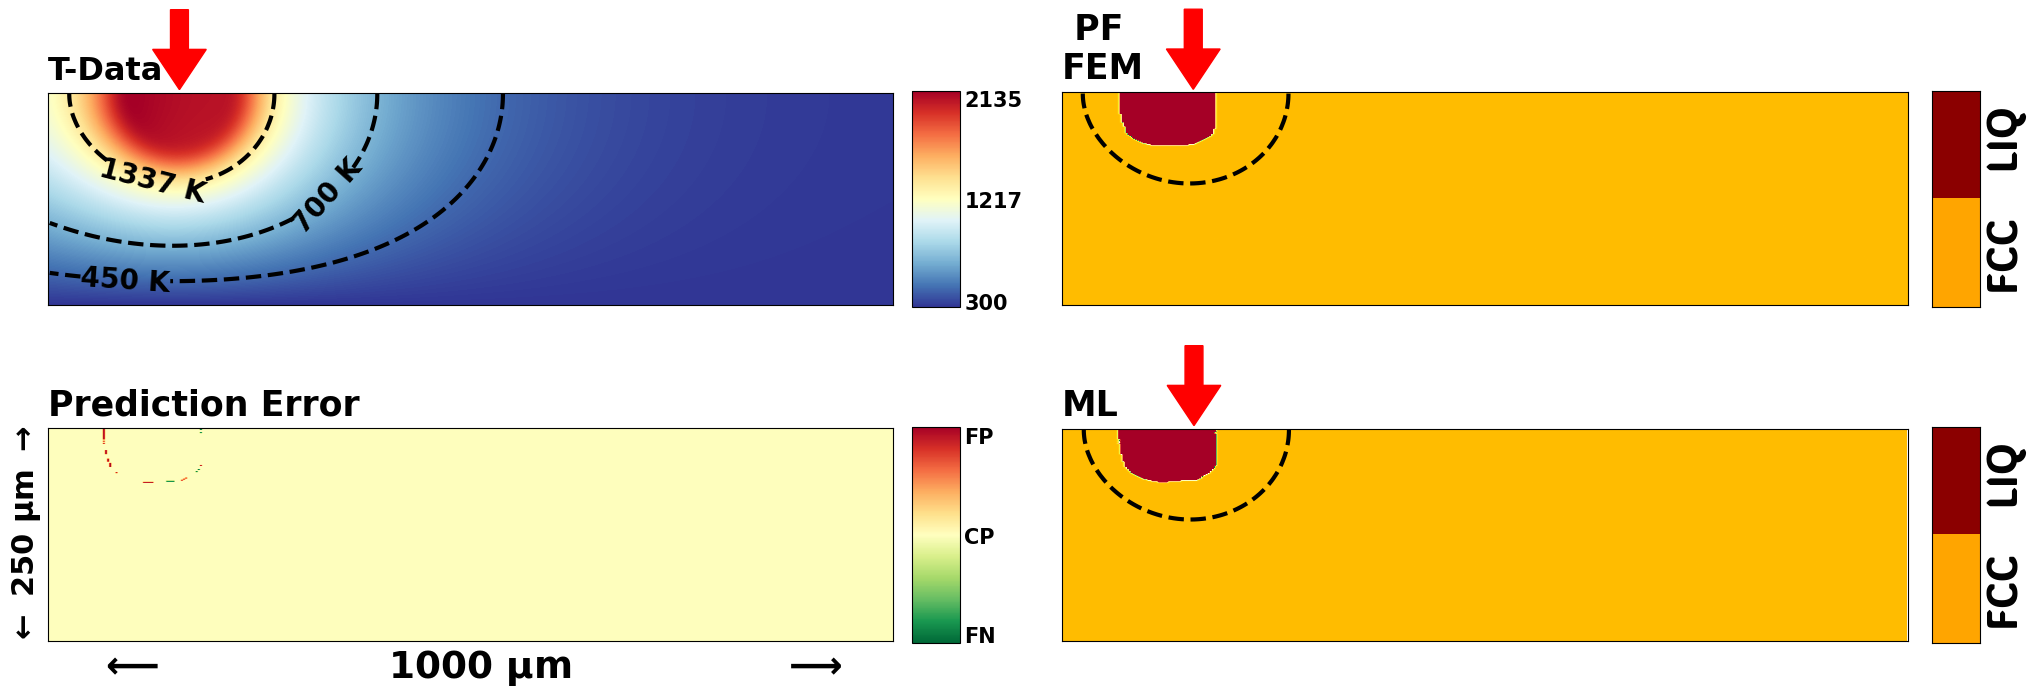

In [202]:
t_step = 0
laser_speed = 30
laser_pos = (125 + time[t_step]*laser_speed)* 401/1000  # Laser actual position in true dimension

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 8))

cmap = plt.get_cmap('RdYlBu_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(T_data[t_step], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')
ax1.set_title('T-Data', pad=10, loc='left', fontsize=23, weight='bold')
ax1.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
ax1.set_ylim(201, -1);  ax1.set_xlim(-1,401)
contour_levels = [450, 700, 1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(T_data[t_step], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
############## Color Bar ##########
ax1a = fig.add_axes([0.485, 0.57, 0.02, 0.27]) 
cbar = fig.colorbar(hmap1, cax=ax1a)
cbar.ax.tick_params(labelsize=15,length=0)
cbar.set_ticks([np.min(T_data[t_step])*1.15, (np.max(T_data[t_step])+300)/2, np.max(T_data[t_step])*0.97], labels=[f'{np.min(T_data[t_step]):.0f}', f'{(np.max(T_data[t_step])+300)/2 :.0f}', f'{np.max(T_data[t_step]):.0f}'], weight='bold') 
# line = Line2D([0.533, 0.533], [0.57, 0.82], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
# fig.add_artist(line)


cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap2 = ax2.imshow(LIQ_PF[t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap2 = ax2.imshow(1-LIQ_PF[t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
ax2.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax2.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax2.set_ylim(201, -1);  ax4.set_xlim(-1,401)
ax2.set_title(' PF\nFEM', pad=10, loc='left', fontsize=25, weight='bold')
ax2.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
ax2.contour(T_data[t_step], levels=[1337], colors='black', linewidths=3, linestyles='dashed')
# ############## Color Bar ##########
ax2a = fig.add_axes([0.91, 0.57, 0.02, 0.27]) 
cmap = ListedColormap(['#8B0000', '#FFA500'])
data = np.array([[0], [1]])
cbar = ax2a.imshow(data, cmap=cmap, aspect='auto')
ax2a.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
text = Text(x=0.932, y=0.6, text=r'FCC    LIQ', fontsize=30, color='k', rotation=90, weight='bold', fontfamily='ADLaM Display')
fig.add_artist(text)


cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap3 = ax3.imshow(pred_error_PFT[t_step], cmap=cmap, vmin=-1, vmax=1, aspect=0.5)
ax3.set_title('Prediction Error', pad=10, loc='left', fontsize=25, weight='bold')
ax3.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax3.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax3.set_ylim(201, -1);  ax1.set_xlim(-1,401)
ax3.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90, xycoords='axes fraction', textcoords='axes fraction', fontsize = 22, weight = 'bold', color='k', ha='center', va='center')
ax3.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax3a = fig.add_axes([0.485, 0.15, 0.02, 0.27])
cbar = fig.colorbar(hmap3, cax=ax3a, orientation='vertical')
cbar.ax.tick_params(labelsize=15, length=0)#direction='inout', length=20, width=5, rotation=0) 
cbar.set_ticks([-0.92,0,0.92], labels=['FN','CP','FP'], weight='bold')


cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap4a = ax4.imshow(LIQ_ML[t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap4b = ax4.imshow(1-LIQ_ML[t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
ax4.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax4.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax4.set_ylim(201, -1);  ax4.set_xlim(-1,401)
ax4.set_title('ML', pad=10, loc='left', fontsize=25, weight='bold')
ax4.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)

ax4.contour(T_data[t_step], levels=[1337], colors='black', linewidths=3, linestyles='dashed')
# ############## Color Bar ##########
ax4a = fig.add_axes([0.91, 0.15, 0.02, 0.27]) 
cmap = ListedColormap(['#8B0000', '#FFA500'])
data = np.array([[0], [1]])
cbar = ax4a.imshow(data, cmap=cmap, aspect='auto')
ax4a.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
text = Text(x=0.932, y=0.18, text=r'FCC    LIQ', fontsize=30, color='k', rotation=90, weight='bold', fontfamily='ADLaM Display')
fig.add_artist(text)

plt.show()

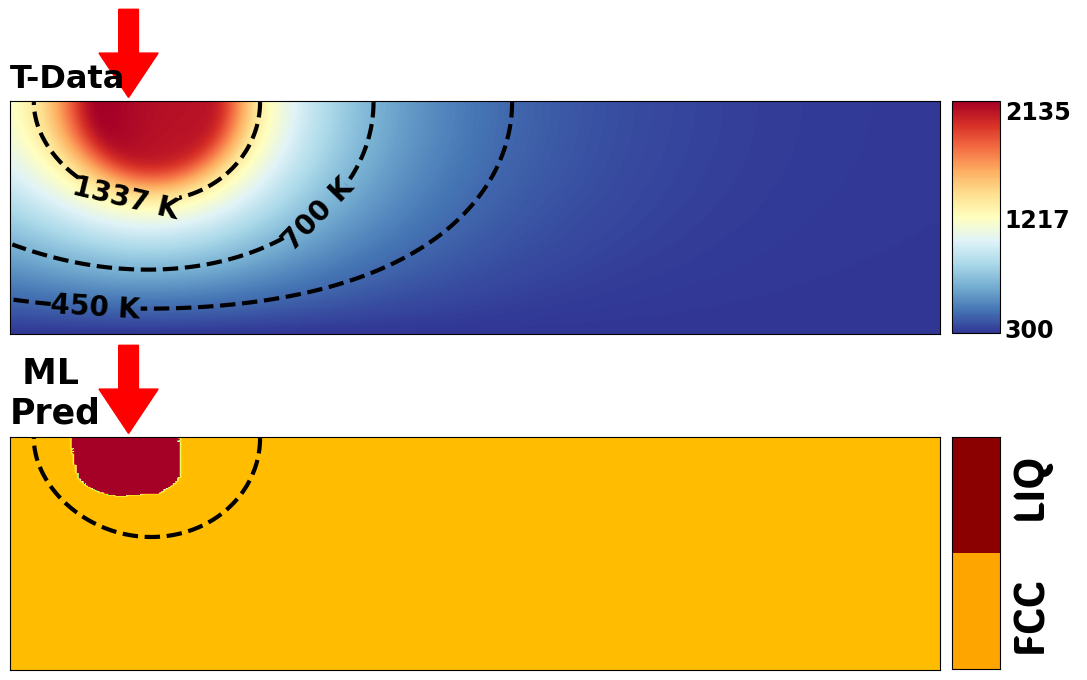

In [237]:
laser_speed = 0
laser_pos = (125 + time[t_step] * laser_speed) * 401 / 1000  # Laser actual position in true dimension

# Create the figure
fig, ((ax1, ax4)) = plt.subplots(2, 1, figsize=(12, 8))

# Plot T_data
cmap = plt.get_cmap('RdYlBu_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(T_data[t_step], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')
ax1.set_title('T-Data', pad=10, loc='left', fontsize=23, weight='bold')
ax1.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
ax1.set_ylim(200, -1);  ax1.set_xlim(-1,400)
contour_levels = [450, 700, 1337]
label_colors = ['k', 'k', 'k']
contour = ax1.contour(T_data[t_step], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
############## Color Bar ##########
ax1a = fig.add_axes([0.91, 0.56, 0.04, 0.29]) 
cbar = fig.colorbar(hmap1, cax=ax1a)
cbar.ax.tick_params(labelsize=17,length=0)
cbar.set_ticks([np.min(T_data[t_step])*1.15, (np.max(T_data[t_step])+300)/2, np.max(T_data[t_step])*0.97], labels=[f'{np.min(T_data[t_step]):.0f}', f'{(np.max(T_data[t_step])+300)/2 :.0f}', f'{np.max(T_data[t_step]):.0f}'], weight='bold') 
line = Line2D([1.015, 1.015], [0.57, 0.82], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# Plot ML
cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap4a = ax4.imshow(LIQ_ML[t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap4b = ax4.imshow(1-LIQ_ML[t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
ax4.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax4.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax4.set_ylim(200, -1);  ax4.set_xlim(-1,400)
ax4.set_title(' ML\nPred', pad=10, loc='left', fontsize=25, weight='bold')
ax4.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)

ax4.contour(T_data[t_step], levels=[1337], colors='black', linewidths=3, linestyles='dashed')
# ############## Color Bar ##########
ax4a = fig.add_axes([0.91, 0.14, 0.04, 0.29]) 
cmap = ListedColormap(['#8B0000', '#FFA500'])
data = np.array([[0], [1]])
cbar = ax4a.imshow(data, cmap=cmap, aspect='auto')
ax4a.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
text = Text(x=0.96, y=0.17, text=r'FCC     LIQ', fontsize=30, color='k', rotation=90, weight='bold', fontfamily='ADLaM Display')
fig.add_artist(text)
plt.show()